In [1]:
import pandas as pd
import seaborn as sns

filepath = 'C:\\Users\\Snapp-Kitchen\\Desktop\\data set paper.csv'
df = pd.read_csv(filepath)
filepath_1 = 'C:\\Users\\Snapp-Kitchen\\Desktop\\Graduate Project\\Supplemental_Spreadsheet dataset jadid.csv'
df_1 = pd.read_csv(filepath_1)
df = df.drop('NO.', axis = 1)
df['Sex,  Female/Male'] = df['Sex,  Female/Male'].map({'Male': 1, 'Female': 0})
df['Lateral/Bifurcation'] = df['Lateral/Bifurcation'].map({'Bifurcation': 1, 'Lateral': 0})
df['Regular/Irregular'] = df['Regular/Irregular'].map({'Regular': 1, 'Irregular': 0})
df['Stable Flow/Unstable Flow'] = df['Stable Flow/Unstable Flow'].map({'Stable': 1, 'Unstable': 0})
df['Simple Flow/Complex Flow'] = df['Simple Flow/Complex Flow'].map({'Simple': 1, 'Complex': 0})
site_mapping = {
    'L MCA': 1, 'L C7': 2, 'R MCA': 3, 'R C7 (1)': 4, 'R C7 (2)': 5,
    'R C7': 6, 'R C5': 7, 'L ACoA': 8, 'L C5': 9, 'R C6': 10,
    'L C4': 11, 'R C4': 12, 'L C6': 13, 'LC6': 14, 'R ACoA': 15,
    'BA': 16, 'L C4 (1)': 17, 'L C4 (2)': 18, 'L C6 ': 19,
    'L C7  ': 20, 'R ACA': 21, 'L ACA (1)': 22, 'L ACA (2)': 23,
    'R PCA': 24
}
df['Site'] = df['Site'].map(site_mapping)
df['Rupture, yes/no'] = df['Rupture, yes/no'].map({'yes': 1, 'no': 0})

df_1['Sex'] = df_1['Sex'].map({'male': 1, 'female': 0})
df_1['Unstable Flow Pattern'] = df_1['Unstable Flow Pattern'].map({'stable': 1, 'unstable': 0})
df_1['Complex Flow Pattern'] = df_1['Complex Flow Pattern'].map({'simple': 1, 'complex': 0})
df_1['Rupture Status'] = df_1['Rupture Status'].map({'ruptured': 1, 'unruptured': 0})
df_1['Irregular Shape'] = df_1['Irregular Shape'].map({'smooth': 1, 'irregular': 0})
location_mapping = {'ACA': 1, 'IC': 2, 'MCA': 3, 'VA, BA and PCA': 4}  # Add more mappings as needed
df_1['location_mapped'] = df_1['Location'].map(location_mapping)
df_1 = df_1.drop(columns='Location')
	

In [2]:
df_1.head(10)

,Rupture Status,Age,Sex,Maximum Size,Projection Length,Neck Width,Aspect Ratio,Projection Ratio,Size Ratio,Dome Volume,...,Gradient Oscillatory Number,Low Shear Area Ratio,Standardized Pressure Difference,Oscillatory Velocity Index,Neck Pressure Loss Coefficient,Neck Energy Loss,Flow Velocity,Complex Flow Pattern,Unstable Flow Pattern,location_mapped
0,1,53,0,3.390,3.160,2.100,1.500,1.510,1.640,1.430000e-08,...,0.0544,0.38800,0.424,0.016500,0.973,1350,0.1060,1,1,1
1,1,60,1,4.949,4.024,3.010,1.331,1.337,1.703,3.360000e-08,...,0.0194,0.04340,4.455,0.004270,1.689,2443,0.1680,1,1,2
2,1,66,1,7.220,6.310,4.800,1.300,1.310,1.860,1.040000e-07,...,0.0361,0.13200,0.994,0.005380,1.150,2600,0.2200,1,1,2
3,1,46,0,5.223,4.799,2.726,1.670,1.761,2.285,2.730000e-08,...,0.0254,0.45300,1.815,0.006750,0.927,2666,0.1100,1,1,2
4,1,67,0,5.544,4.539,3.378,1.234,1.344,1.637,3.510000e-08,...,0.0136,0.30100,2.276,0.003210,0.763,920,0.0942,1,1,2
5,1,38,0,3.350,2.122,3.078,0.585,0.689,1.470,6.700000e-09,...,0.0136,0.00000,1.702,0.003490,1.144,52480,0.4770,1,1,2
6,1,76,0,5.495,4.308,3.848,1.114,1.120,1.826,3.810000e-08,...,0.0211,0.00814,2.071,0.002800,1.700,15470,0.3560,1,1,2
7,1,26,0,5.794,5.390,3.249,1.655,1.659,2.083,3.210000e-08,...,0.0271,0.26000,1.649,0.005370,1.186,765,0.0808,1,1,2
8,1,83,0,6.055,3.538,6.055,0.568,0.584,1.774,4.370000e-08,...,0.0139,0.01100,1.248,0.000933,0.301,4340,0.3980,1,1,2
9,1,73,0,3.246,2.627,3.071,0.856,0.855,1.161,1.230000e-08,...,0.0176,0.27600,0.621,0.004930,0.259,222,0.0969,1,1,2


filtering

In [2]:

df_filtered = df_1[df_1['Aspect Ratio'] <= 3.5]
df_1 = df_filtered
df_filtered = df_1[df_1['Maximum Size'] <= 18.5]
df_1 = df_filtered


Correlation method 

In [3]:
import pandas as pd


correlation_with_target = df_1.corr().abs()['Rupture Status']


sorted_correlation = correlation_with_target.sort_values(ascending=False)


top_15_correlation = sorted_correlation.head(30)


print(top_15_correlation)


Rupture Status                      1.000000
Irregular Shape                     0.484076
Complex Flow Pattern                0.426958
Aspect Ratio                        0.405172
Projection Ratio                    0.387870
Size Ratio                          0.374279
Maximum Size                        0.314864
Projection Length                   0.311271
Unstable Flow Pattern               0.305329
Low Shear Area Ratio                0.302446
Normalized Wall Shear Stress        0.291448
Volume-to-Ostium Area Ratio         0.260050
Dome Area                           0.238116
Oscillatory Shear Index             0.232246
location_mapped                     0.191381
Dome Volume                         0.181760
Standardized Pressure Difference    0.131449
Gradient Oscillatory Number         0.127601
Sex                                 0.115577
Wall Shear Stress                   0.095353
Flow Velocity                       0.091730
Neck Energy Loss                    0.081533
Neck Press

In [4]:
features = [
     'Irregular Shape', 'Complex Flow Pattern',
    'Aspect Ratio',  'Size Ratio', 'Maximum Size',
     'Unstable Flow Pattern', 'Low Shear Area Ratio',
    'Normalized Wall Shear Stress', 
    'Dome Area', 'Oscillatory Shear Index', 'location_mapped','Sex','location_mapped','Dome Volume'
] #from correlation


In [13]:
features = ['Age', 'Sex', 'Maximum Size', 'Projection Length',
       'Neck Width', 'Aspect Ratio', 'Projection Ratio', 'Size Ratio',
       'Dome Volume', 'Dome Area', 'Volume-to-Ostium Area Ratio',
       'Irregular Shape', 'Wall Shear Stress', 'Normalized Wall Shear Stress',
       'Oscillatory Shear Index', 'Wall Shear Stress Gradient',
       'Gradient Oscillatory Number', 'Low Shear Area Ratio',
       'Standardized Pressure Difference', 'Oscillatory Velocity Index',
       'Neck Pressure Loss Coefficient', 'Neck Energy Loss', 'Flow Velocity',
       'Complex Flow Pattern', 'Unstable Flow Pattern', 'location_mapped']

In [89]:

features = ['Size Ratio','Neck Width','Oscillatory Shear Index',
            'Aspect Ratio','Neck Energy Loss','Wall Shear Stress Gradient',
            'Neck Energy Loss','Wall Shear Stress','Age','location_mapped']

features_not_to_scaled = ['Age','location_mapped']

features_to_scaled = ['Size Ratio','Neck Width','Oscillatory Shear Index',
            'Aspect Ratio','Neck Energy Loss','Wall Shear Stress Gradient',
            'Neck Energy Loss','Wall Shear Stress'] #my idee

In [29]:
features = ['Size Ratio','Neck Width','Standardized Pressure Difference',
            'Projection Length','Neck Energy Loss','Wall Shear Stress Gradient',
            'Neck Pressure Loss Coefficient','Age','Wall Shear Stress'] ## from variance

In [5]:
from sklearn.model_selection import train_test_split


target = ['Rupture Status']



df_shuffled = df_1.sample(frac=1, random_state=42)  


train, test = train_test_split(df_shuffled, test_size=0.2, random_state=42)
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [96]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(x_train)


X_test_scaled = scaler.transform(x_test)


In [107]:
import pandas as pd


nan_values = x_train.isna()


nan_counts = nan_values.sum()


print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
Rupture Status                  0
Irregular Shape                 0
Complex Flow Pattern            0
Aspect Ratio                    0
Projection Ratio                0
Size Ratio                      0
Maximum Size                    0
Projection Length               0
Unstable Flow Pattern           0
Low Shear Area Ratio            0
Normalized Wall Shear Stress    0
Volume-to-Ostium Area Ratio     0
Dome Area                       0
Oscillatory Shear Index         0
location_mapped                 0
dtype: int64


In [94]:
X_train_scaled

,Size Ratio,Neck Width,Oscillatory Shear Index,Aspect Ratio,Neck Energy Loss,Neck Energy Loss,Wall Shear Stress Gradient,Neck Energy Loss,Neck Energy Loss,Wall Shear Stress,Age,location_mapped
0,-0.978758,-1.025209,-0.281482,-0.519847,0.060415,0.060415,0.170748,0.060415,0.060415,0.021074,53.0,1.0
1,3.038576,1.056725,-0.058692,3.458241,-0.229626,-0.229626,-0.314868,-0.229626,-0.229626,-0.171169,60.0,2.0
2,-0.056914,-1.206501,-0.040653,0.522382,-0.240011,-0.240011,-0.092678,-0.240011,-0.240011,-0.391234,66.0,2.0
3,-0.261012,0.028624,1.186044,-0.295464,0.004820,0.004820,0.554486,0.004820,0.004820,0.079112,46.0,2.0
4,-0.694154,-0.952107,-0.491644,-0.649864,-0.255221,-0.255221,-0.517361,-0.255221,-0.255221,-0.561014,67.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.047970,-0.270216,-0.421741,1.679950,-0.220212,-0.220212,-0.535796,-0.220212,-0.220212,-0.373674,NaN,NaN
197,-0.682815,-0.879006,-0.546665,-0.559691,0.234021,0.234021,1.794480,0.234021,0.234021,0.882406,NaN,NaN
198,-0.714564,0.085935,-0.560646,-1.111213,0.512524,0.512524,0.314832,0.512524,0.512524,0.904071,68.0,2.0
199,-0.101702,1.571945,-0.526822,-0.224164,-0.223018,-0.223018,-0.452548,-0.223018,-0.223018,-0.267404,76.0,2.0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_regression = LogisticRegression()


logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.86      0.76      0.81        25

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45


Confusion Matrix:
[[17  3]
 [ 6 19]]


c:\Users\Snapp-Kitchen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Feature Coefficients (Absolute Values):
                         Feature   Coefficient  Abs_Coefficient
2                   Aspect Ratio  1.092829e+00     1.092829e+00
0                Irregular Shape -1.091810e+00     1.091810e+00
1           Complex Flow Pattern -8.180745e-01     8.180745e-01
11                           Sex -6.329149e-01     6.329149e-01
5          Unstable Flow Pattern -2.299701e-01     2.299701e-01
3                     Size Ratio  1.757505e-01     1.757505e-01
12               location_mapped -1.548359e-01     1.548359e-01
10               location_mapped -1.548359e-01     1.548359e-01
9        Oscillatory Shear Index  1.231298e-01     1.231298e-01
6           Low Shear Area Ratio  9.475198e-02     9.475198e-02
4                   Maximum Size -6.383825e-02     6.383825e-02
7   Normalized Wall Shear Stress  8.969475e-03     8.969475e-03
8                      Dome Area -1.373205e-04     1.373205e-04
13                   Dome Volume -1.707313e-08     1.707313e-08

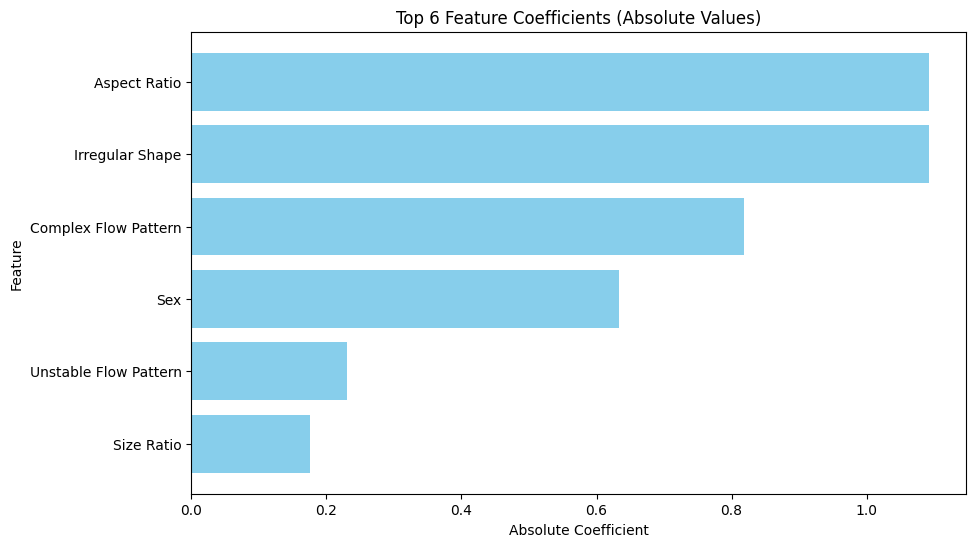

In [16]:
import matplotlib.pyplot as plt


feature_coefficients = logistic_regression.coef_[0]
feature_names = x_train.columns  


feature_coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_coefficients
})


feature_coefficients_df['Abs_Coefficient'] = feature_coefficients_df['Coefficient'].abs()


feature_coefficients_df = feature_coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)


print("\nFeature Coefficients (Absolute Values):")
print(feature_coefficients_df)


top_features = feature_coefficients_df.head(6)
feature_names = top_features['Feature']
abs_coefficients = top_features['Abs_Coefficient']


plt.figure(figsize=(10, 6))
plt.barh(feature_names, abs_coefficients, color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 6 Feature Coefficients (Absolute Values)')
plt.gca().invert_yaxis()  
plt.show()


In [7]:

y_proba = logistic_regression.predict_proba(x_test)


print("Predicted Probabilities:")
print(y_proba)


Predicted Probabilities:
[[0.72286687 0.27713313]
 [0.91311776 0.08688224]
 [0.62635095 0.37364905]
 [0.19204108 0.80795892]
 [0.09568259 0.90431741]
 [0.49758674 0.50241326]
 [0.29982066 0.70017934]
 [0.8507541  0.1492459 ]
 [0.56799051 0.43200949]
 [0.9011131  0.0988869 ]
 [0.3807205  0.6192795 ]
 [0.71245079 0.28754921]
 [0.15566497 0.84433503]
 [0.76097894 0.23902106]
 [0.48831048 0.51168952]
 [0.83560948 0.16439052]
 [0.14999634 0.85000366]
 [0.86265175 0.13734825]
 [0.0693577  0.9306423 ]
 [0.05278909 0.94721091]
 [0.84372266 0.15627734]
 [0.82182778 0.17817222]
 [0.34602277 0.65397723]
 [0.77271286 0.22728714]
 [0.02520835 0.97479165]
 [0.08859653 0.91140347]
 [0.56754698 0.43245302]
 [0.78545004 0.21454996]
 [0.30968449 0.69031551]
 [0.83940815 0.16059185]
 [0.18773788 0.81226212]
 [0.70726155 0.29273845]
 [0.73253246 0.26746754]
 [0.14422657 0.85577343]
 [0.1444931  0.8555069 ]
 [0.85263449 0.14736551]
 [0.41415412 0.58584588]
 [0.73344096 0.26655904]
 [0.30548267 0.69451733]


In [8]:
import pandas as pd


y_proba = logistic_regression.predict_proba(x_test)


proba_df = pd.DataFrame(y_proba[:, 1], columns=['Probability_Class_1'], index=x_test.index)


result_df = pd.concat([x_test, y_test, proba_df], axis=1)

result_df.columns


Index(['Irregular Shape', 'Complex Flow Pattern', 'Aspect Ratio', 'Size Ratio',
       'Maximum Size', 'Unstable Flow Pattern', 'Low Shear Area Ratio',
       'Normalized Wall Shear Stress', 'Dome Area', 'Oscillatory Shear Index',
       'location_mapped', 'Sex', 'location_mapped', 'Dome Volume',
       'Rupture Status', 'Probability_Class_1'],
      dtype='object')

In [9]:

high_threshold = 0.65
medium_threshold = 0.2


high_proba_df = result_df[result_df['Probability_Class_1'] > high_threshold]
medium_proba_df = result_df[(result_df['Probability_Class_1'] <= high_threshold) & (result_df['Probability_Class_1'] > medium_threshold)]
low_proba_df = result_df[result_df['Probability_Class_1'] <= medium_threshold]
medium_proba_df.count()

Irregular Shape                 19
Complex Flow Pattern            19
Aspect Ratio                    19
Size Ratio                      19
Maximum Size                    19
Unstable Flow Pattern           19
Low Shear Area Ratio            19
Normalized Wall Shear Stress    19
Dome Area                       19
Oscillatory Shear Index         19
location_mapped                 19
Sex                             19
location_mapped                 19
Dome Volume                     19
Rupture Status                  19
Probability_Class_1             19
dtype: int64

c:\Users\Snapp-Kitchen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


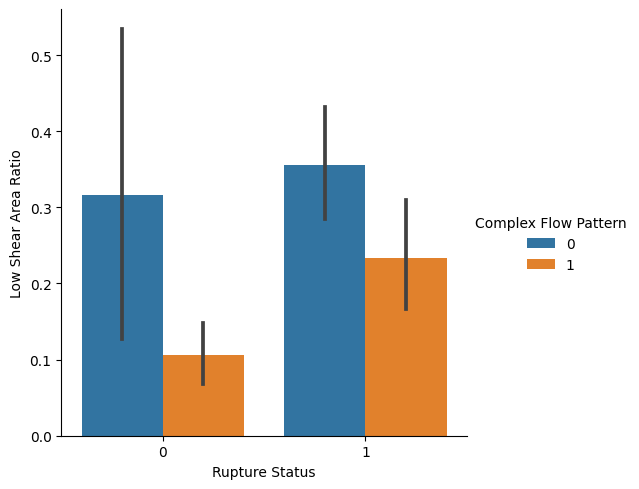

In [10]:
sns.catplot(data=df_1, kind="bar", x="Rupture Status", y="Low Shear Area Ratio", hue="Complex Flow Pattern")

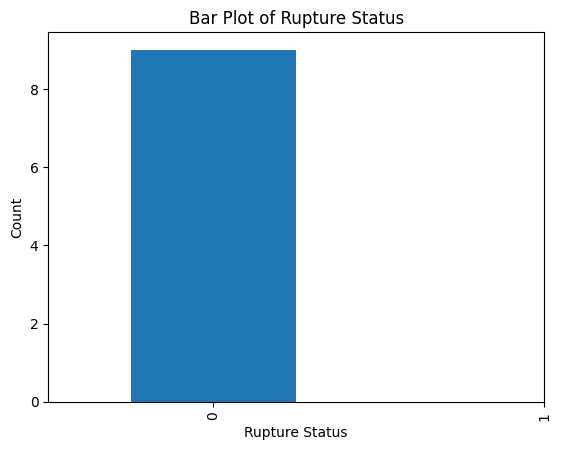

In [20]:
filtered_df_high_prob = high_proba_df[(high_proba_df["Irregular Shape"] == 0) & 
                 (high_proba_df["Complex Flow Pattern"] == 0) & 
                 (high_proba_df["Unstable Flow Pattern"] == 0)]


rupture_counts = filtered_df_high_prob['Rupture Status'].value_counts()


rupture_counts.plot(kind='bar')
plt.xlabel('Rupture Status')
plt.ylabel('Count')
plt.title('Bar Plot of Rupture Status')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [39]:
low_proba_df[['Unstable Flow Pattern','Irregular Shape','Complex Flow Pattern','Rupture Status','Probability_Class_1']]

,Unstable Flow Pattern,Irregular Shape,Complex Flow Pattern,Rupture Status,Probability_Class_1
176,1,1,1,0,0.087993
158,1,1,1,0,0.150019
175,1,1,1,0,0.099965
127,1,1,1,0,0.164178
152,1,1,1,0,0.138131
169,1,1,1,0,0.157150
210,0,1,1,0,0.179589
125,1,1,1,0,0.160335
11,1,1,1,1,0.148303


In [37]:
high_proba_df[['Unstable Flow Pattern','Irregular Shape','Complex Flow Pattern','Rupture Status','Probability_Class_1']]

,Unstable Flow Pattern,Irregular Shape,Complex Flow Pattern,Rupture Status,Probability_Class_1
39,1,0,0,1,0.807529
92,0,0,0,1,0.903963
109,0,0,0,1,0.702664
37,1,0,0,1,0.843345
59,0,0,1,1,0.849610
99,0,0,0,1,0.931144
77,0,0,0,1,0.947036
42,1,0,0,1,0.654927
94,0,0,0,1,0.974840
81,0,0,0,1,0.910810


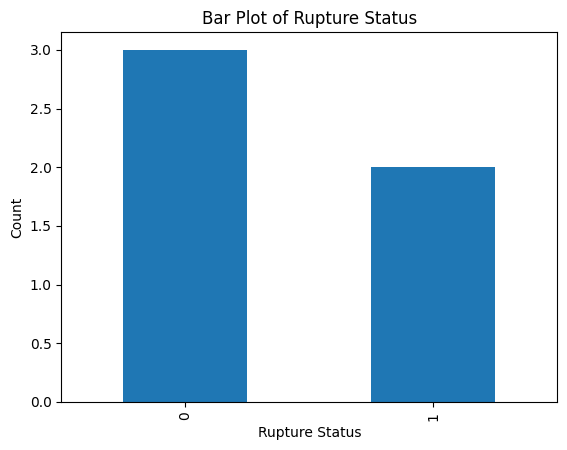

In [27]:
filtered_df_medium_prob = medium_proba_df[(medium_proba_df["Irregular Shape"] == 1) & 
                 (medium_proba_df["Complex Flow Pattern"] == 1) & 
                 (medium_proba_df["Unstable Flow Pattern"] == 0)]


rupture_counts = filtered_df_medium_prob['Rupture Status'].value_counts()


rupture_counts.plot(kind='bar')
plt.xlabel('Rupture Status')
plt.ylabel('Count')
plt.title('Bar Plot of Rupture Status')
plt.xticks([0, 1], ['0', '1'])
plt.show()

C:\Users\Snapp-Kitchen\AppData\Local\Temp\ipykernel_15552\922018806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_proba_df['rupture_status_count'] = high_proba_df['Rupture Status'].isin([0, 1]).sum()
C:\Users\Snapp-Kitchen\AppData\Local\Temp\ipykernel_15552\922018806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_proba_df['rupture_status_count'] = medium_proba_df['Rupture Status'].isin([0, 1]).sum()
C:\Users\Snapp-Kitchen\AppData\Local\Temp\ipykernel_15552\922018806.py:9: SettingWithC

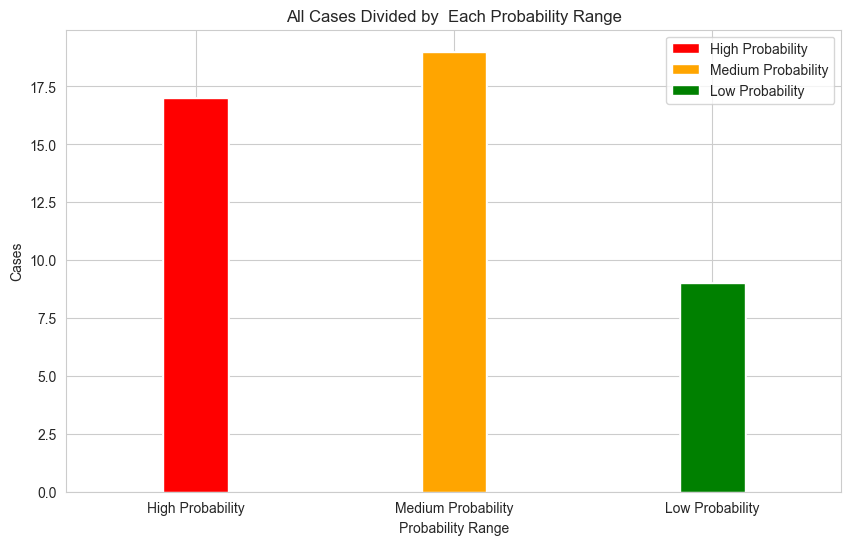

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

high_proba_df['rupture_status_count'] = high_proba_df['Rupture Status'].isin([0, 1]).sum()
medium_proba_df['rupture_status_count'] = medium_proba_df['Rupture Status'].isin([0, 1]).sum()
low_proba_df['rupture_status_count'] = low_proba_df['Rupture Status'].isin([0, 1]).sum()


plt.figure(figsize=(10, 6))


bar_width = 0.25


plt.bar('High Probability', high_proba_df['rupture_status_count'], color='Red', label='High Probability', width=bar_width)


plt.bar('Medium Probability', medium_proba_df['rupture_status_count'], color='orange', label='Medium Probability', width=bar_width)


plt.bar('Low Probability', low_proba_df['rupture_status_count'], color='green', label='Low Probability', width=bar_width)

plt.xlabel('Probability Range')
plt.ylabel('Cases')
plt.title('All Cases Divided by  Each Probability Range')
plt.legend()


plt.xlim(-0.5, 2.5)

plt.show()


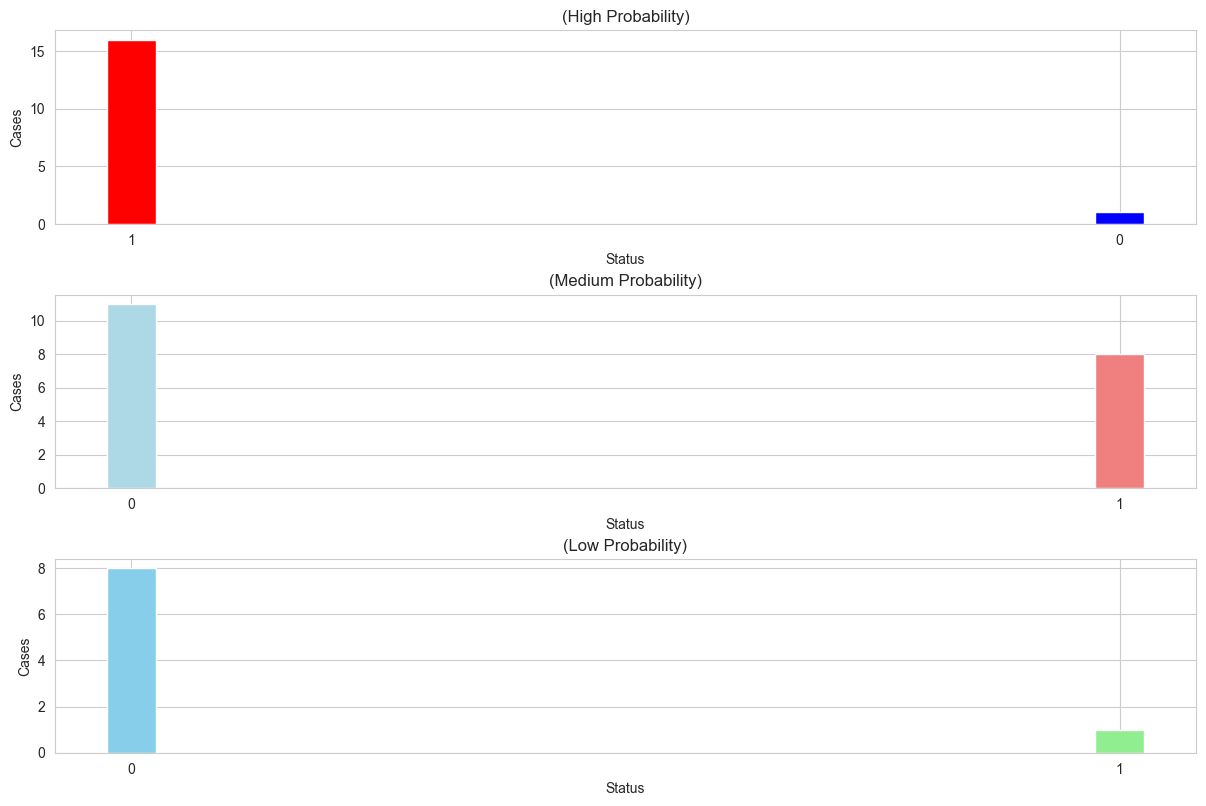

In [88]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(12, 8))


bar_width = 0.05


value_counts_high = high_proba_df['Rupture Status'].value_counts()
colors_high = ['red' if value == 1 else 'blue' for value in value_counts_high.index]
axes[0].bar(value_counts_high.index.astype(str), value_counts_high.values, color=colors_high, width=bar_width)
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Cases')
axes[0].set_title('(High Probability)')


value_counts_medium = medium_proba_df['Rupture Status'].value_counts()
colors_medium = ['lightblue', 'lightcoral']
axes[1].bar(value_counts_medium.index.astype(str), value_counts_medium.values, color=colors_medium, width=bar_width)
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Cases')
axes[1].set_title('(Medium Probability)')


value_counts_low = low_proba_df['Rupture Status'].value_counts()
colors_low = ['skyblue', 'lightgreen']
axes[2].bar(value_counts_low.index.astype(str), value_counts_low.values, color=colors_low, width=bar_width)
axes[2].set_xlabel('Status')
axes[2].set_ylabel('Cases')
axes[2].set_title('(Low Probability)')


plt.tight_layout(pad=0.5)

plt.show()


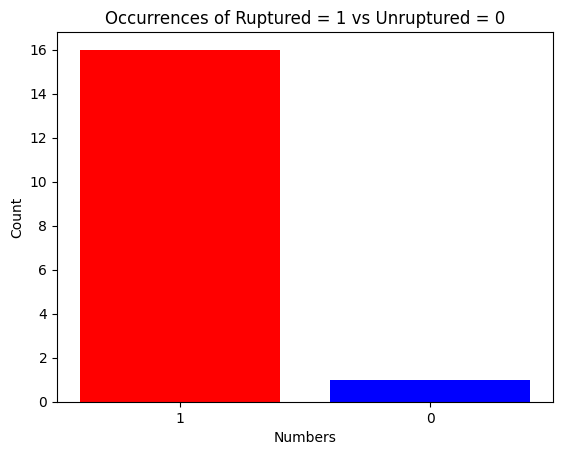

In [21]:
import matplotlib.pyplot as plt


value_counts = high_proba_df['Rupture Status'].value_counts()


colors = ['red' if value == 1 else 'blue' for value in value_counts.index]

plt.bar(value_counts.index.astype(str), value_counts.values, color=colors)
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.title('Occurrences of Ruptured = 1 vs Unruptured = 0')
plt.show()


In [168]:
medium_proba_df

,Irregular Shape,Complex Flow Pattern,Aspect Ratio,Size Ratio,Maximum Size,Unstable Flow Pattern,Low Shear Area Ratio,Normalized Wall Shear Stress,Dome Area,Oscillatory Shear Index,location_mapped,Rupture Status,Probability_Class_1
186,0,1,0.540,2.070,5.610,1,0.000579,0.834,0.000040,0.00145,3,0,0.375795
176,1,1,0.412,3.180,6.402,1,0.080400,0.231,0.000041,0.01040,4,0,0.131710
6,1,1,1.114,1.826,5.495,1,0.008140,0.640,0.000052,0.00663,2,1,0.323613
158,1,1,0.750,2.299,4.951,1,0.003420,0.544,0.000037,0.00576,3,0,0.213708
197,1,1,1.138,1.067,3.655,0,0.058800,0.372,0.000016,0.00886,2,0,0.382248
175,1,1,0.726,0.739,2.741,1,0.002500,0.581,0.000012,0.00265,4,0,0.147343
45,1,1,0.645,2.335,3.699,0,0.175000,0.138,0.000020,0.00394,1,1,0.381169
143,1,1,0.481,1.356,3.444,1,0.000000,0.996,0.000015,0.00297,2,0,0.206815
127,1,1,0.718,1.108,4.230,1,0.033800,0.594,0.000023,0.00474,2,0,0.231845
152,1,1,0.751,1.772,5.140,1,0.097200,0.314,0.000043,0.00419,3,0,0.197802


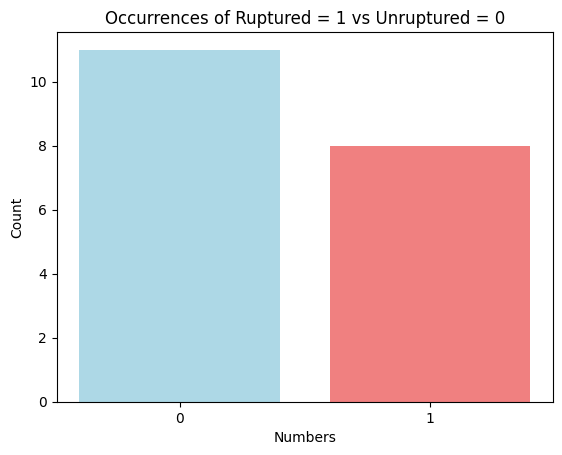

In [22]:
import matplotlib.pyplot as plt


value_counts = medium_proba_df['Rupture Status'].value_counts()


colors = ['lightblue', 'lightcoral']


plt.bar(value_counts.index.astype(str), value_counts.values, color=colors)
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.title('Occurrences of Ruptured = 1 vs Unruptured = 0')
plt.show()


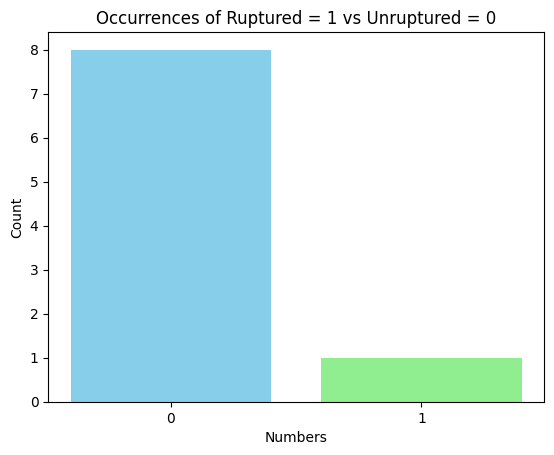

In [23]:
import matplotlib.pyplot as plt


value_counts = low_proba_df['Rupture Status'].value_counts()


colors = ['skyblue', 'lightgreen']


plt.bar(value_counts.index.astype(str), value_counts.values, color=colors)
plt.xlabel('Numbers')
plt.ylabel('Count')
plt.title('Occurrences of Ruptured = 1 vs Unruptured = 0')
plt.show()


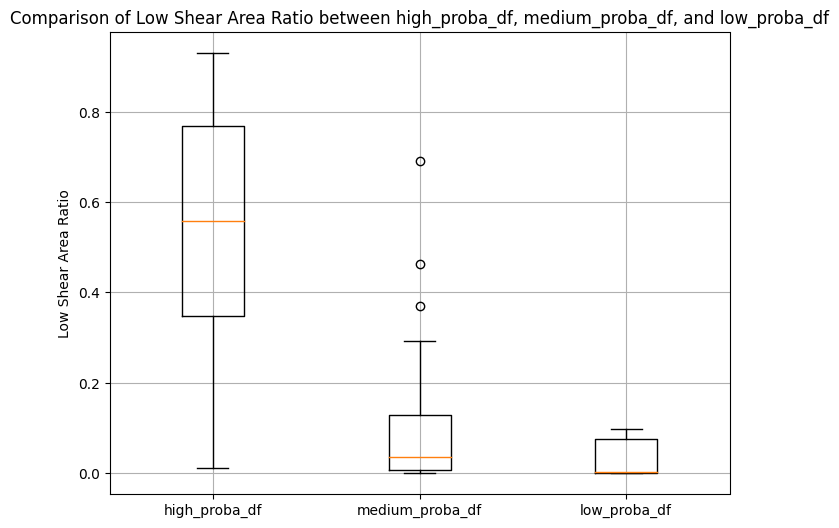

In [194]:
import matplotlib.pyplot as plt

def compare_numerical_boxplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_name], df2[column_name], df3[column_name]], 
                labels=[df1_name, df2_name, df3_name])
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()


compare_numerical_boxplot(high_proba_df,medium_proba_df, low_proba_df,  'Low Shear Area Ratio', 'high_proba_df', 'medium_proba_df', 'low_proba_df')

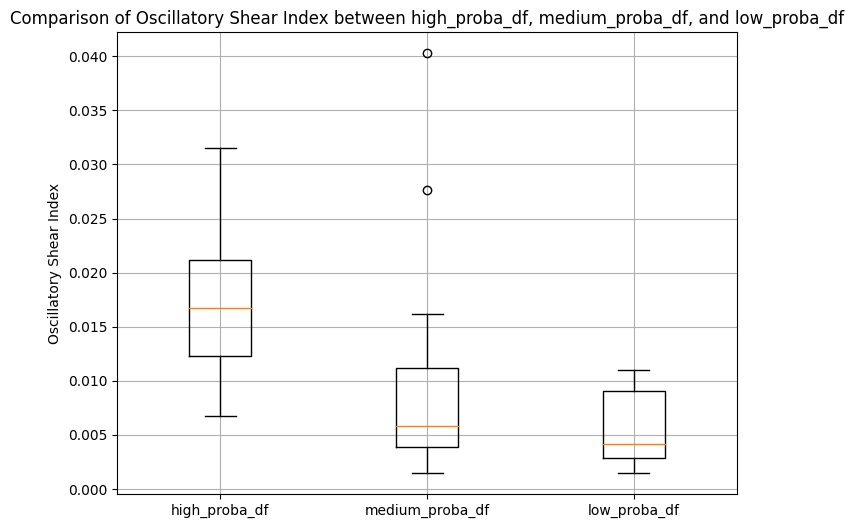

In [195]:
import matplotlib.pyplot as plt

def compare_numerical_boxplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_name], df2[column_name], df3[column_name]], 
                labels=[df1_name, df2_name, df3_name])
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()

compare_numerical_boxplot(high_proba_df,medium_proba_df, low_proba_df,  'Oscillatory Shear Index', 'high_proba_df', 'medium_proba_df', 'low_proba_df')


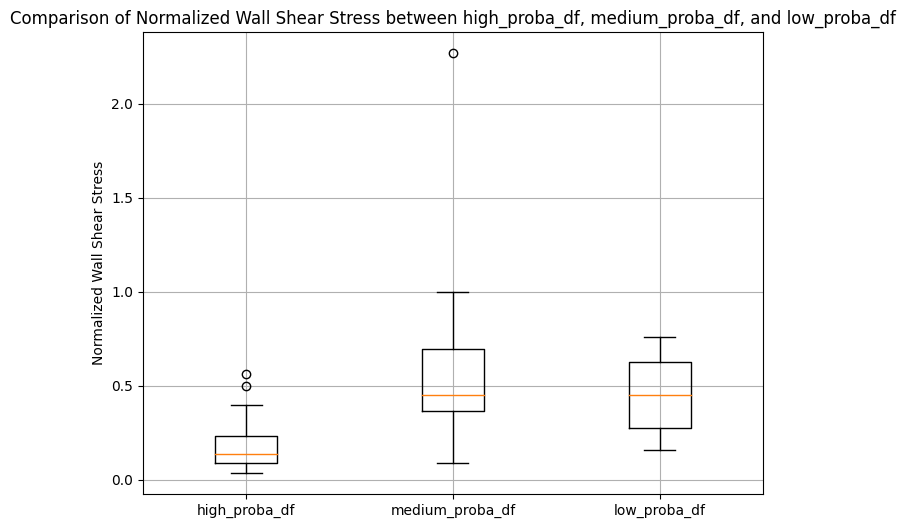

In [198]:

import matplotlib.pyplot as plt

def compare_numerical_boxplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_name], df2[column_name], df3[column_name]], 
                labels=[df1_name, df2_name, df3_name])
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()


compare_numerical_boxplot(high_proba_df,medium_proba_df, low_proba_df,  'Normalized Wall Shear Stress', 'high_proba_df', 'medium_proba_df', 'low_proba_df')

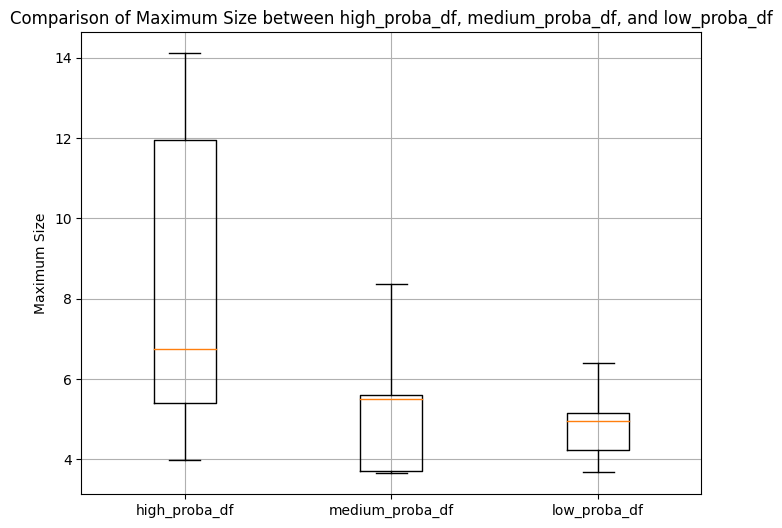

In [101]:
import matplotlib.pyplot as plt

def compare_numerical_boxplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_name], df2[column_name], df3[column_name]], 
                labels=[df1_name, df2_name, df3_name])
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()


compare_numerical_boxplot(high_proba_df,medium_proba_df, low_proba_df[low_proba_df['Maximum Size']>2],  'Maximum Size', 'high_proba_df', 'medium_proba_df', 'low_proba_df')

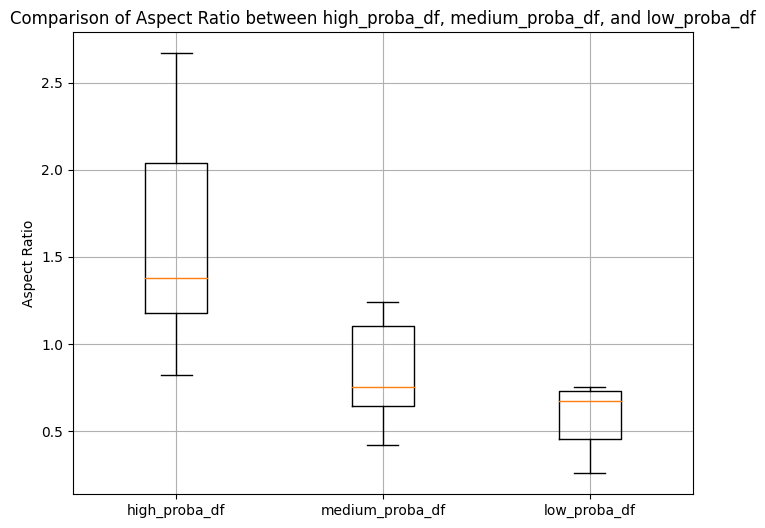

In [199]:
import matplotlib.pyplot as plt

def compare_numerical_boxplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_name], df2[column_name], df3[column_name]], 
                labels=[df1_name, df2_name, df3_name])
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()


compare_numerical_boxplot(high_proba_df,medium_proba_df, low_proba_df,  'Aspect Ratio', 'high_proba_df', 'medium_proba_df', 'low_proba_df')

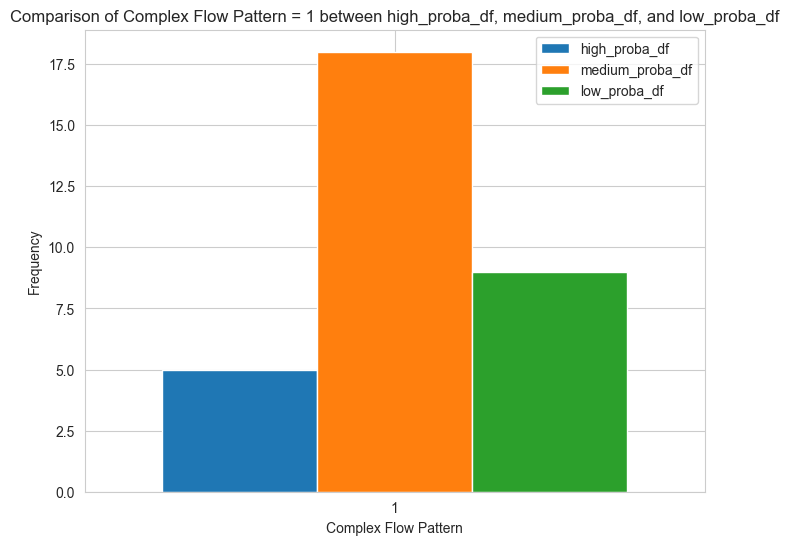

In [95]:
import matplotlib.pyplot as plt

def compare_categorical_barplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    # Filter categories to include only '1' values
    categories = [1]
    category_counts_df1 = df1[df1[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df2 = df2[df2[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df3 = df3[df3[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    
    x = [0.5]
    width = 0.25

    plt.bar(x, category_counts_df1, width=width, label=df1_name)
    plt.bar([i + width for i in x], category_counts_df2, width=width, label=df2_name)
    plt.bar([i + 2 * width for i in x], category_counts_df3, width=width, label=df3_name)

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Comparison of {column_name} = 1 between {df1_name}, {df2_name}, and {df3_name}')
    plt.xticks([i + width for i in x], categories)
    plt.legend()
    plt.grid(True)
    plt.xlim(0.25, 1.25) 
    plt.show()

compare_categorical_barplot(high_proba_df, medium_proba_df, low_proba_df,  
                             'Complex Flow Pattern', 'high_proba_df', 'medium_proba_df', 'low_proba_df')


0 is complex and 1 is simple

In [1]:
import matplotlib.pyplot as plt

def compare_categorical_barplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))

    categories = [1]
    category_counts_df1 = df1[df1[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df2 = df2[df2[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df3 = df3[df3[column_name] == 1][column_name].value_counts().reindex(categories, fill_value=0)
    
    x = [0.5]
    width = 0.25

    plt.bar(x, category_counts_df1, width=width, label=df1_name)
    plt.bar([i + width for i in x], category_counts_df2, width=width, label=df2_name)
    plt.bar([i + 2 * width for i in x], category_counts_df3, width=width, label=df3_name)

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Comparison of {column_name} = 1 between {df1_name}, {df2_name}, and {df3_name}')
    plt.xticks([i + width for i in x], categories)
    plt.legend()
    plt.grid(True)
    plt.xlim(0.25, 1.25)  
    plt.show()


compare_categorical_barplot(high_proba_df, medium_proba_df, low_proba_df,  
                             'Irregular Shape', 'high_proba_df', 'medium_proba_df', 'low_proba_df')


NameError: name 'high_proba_df' is not defined

In [107]:
# df_1['Sex'] = df_1['Sex'].map({'male': 1, 'female': 0})
# df_1['Unstable Flow Pattern'] = df_1['Unstable Flow Pattern'].map({'stable': 1, 'unstable': 0})
# df_1['Complex Flow Pattern'] = df_1['Complex Flow Pattern'].map({'simple': 1, 'complex': 0})
# df_1['Rupture Status'] = df_1['Rupture Status'].map({'ruptured': 1, 'unruptured': 0})
# df_1['Irregular Shape'] = df_1['Irregular Shape'].map({'smooth': 1, 'irregular': 0})

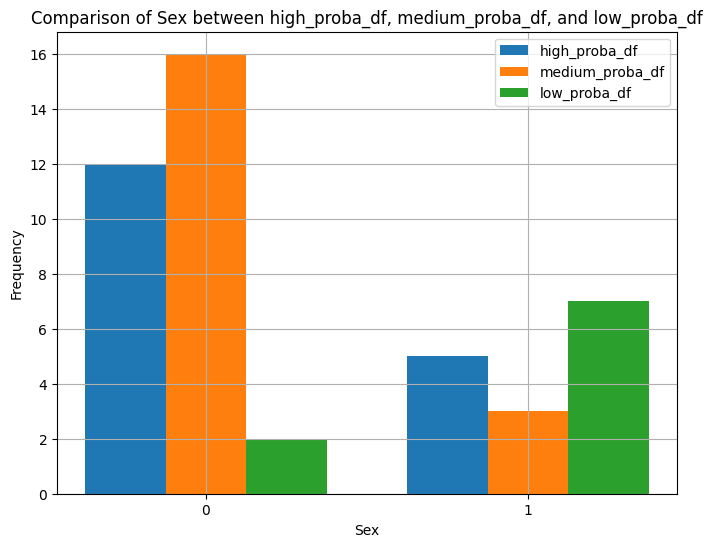

In [24]:

import matplotlib.pyplot as plt

def compare_categorical_barplot(df1, df2, df3, column_name, df1_name, df2_name, df3_name):
    plt.figure(figsize=(8, 6))
    categories = sorted(set(df1[column_name].unique()) | set(df2[column_name].unique()) | set(df3[column_name].unique()))
    category_counts_df1 = df1[column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df2 = df2[column_name].value_counts().reindex(categories, fill_value=0)
    category_counts_df3 = df3[column_name].value_counts().reindex(categories, fill_value=0)
    
    x = range(len(categories))
    width = 0.25

    plt.bar(x, category_counts_df1, width=width, label=df1_name)
    plt.bar([i + width for i in x], category_counts_df2, width=width, label=df2_name)
    plt.bar([i + 2 * width for i in x], category_counts_df3, width=width, label=df3_name)

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Comparison of {column_name} between {df1_name}, {df2_name}, and {df3_name}')
    plt.xticks([i + width for i in x], categories)
    plt.legend()
    plt.grid(True)
    plt.show()


compare_categorical_barplot(high_proba_df, medium_proba_df, low_proba_df,  
                             'Sex', 'high_proba_df', 'medium_proba_df', 'low_proba_df')
